In order to solve this problem, I plan to do the following:
1. Locate the exploitation dates by finding an abnormally high amount of fraudulent activity.
2. Find the customer accounts that were exploited by having many reports of fraudulent activity on the exploitation dates.
3. Use these customer accounts to see the combination of date(s) and merchant that these customer accounts had a lot of activity at before the exploitation.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('PreInterviewTaskData.csv')

In [4]:
df.head()

,account,date,fraud,merchant
0,A0,2015-01-01,False,M98
1,A0,2015-01-01,False,M50
2,A0,2015-01-01,False,M55
3,A0,2015-01-01,False,M14
4,A0,2015-01-01,False,M10


In [5]:
df.describe().transpose()

,count,unique,top,freq
account,89851,1000,A831,121
date,89851,30,2015-01-12,3081
fraud,89851,2,False,88503
merchant,89851,100,M8,998


I first want to do some basic data analysis and visualization to see if there are any trends that are able to be seen visually

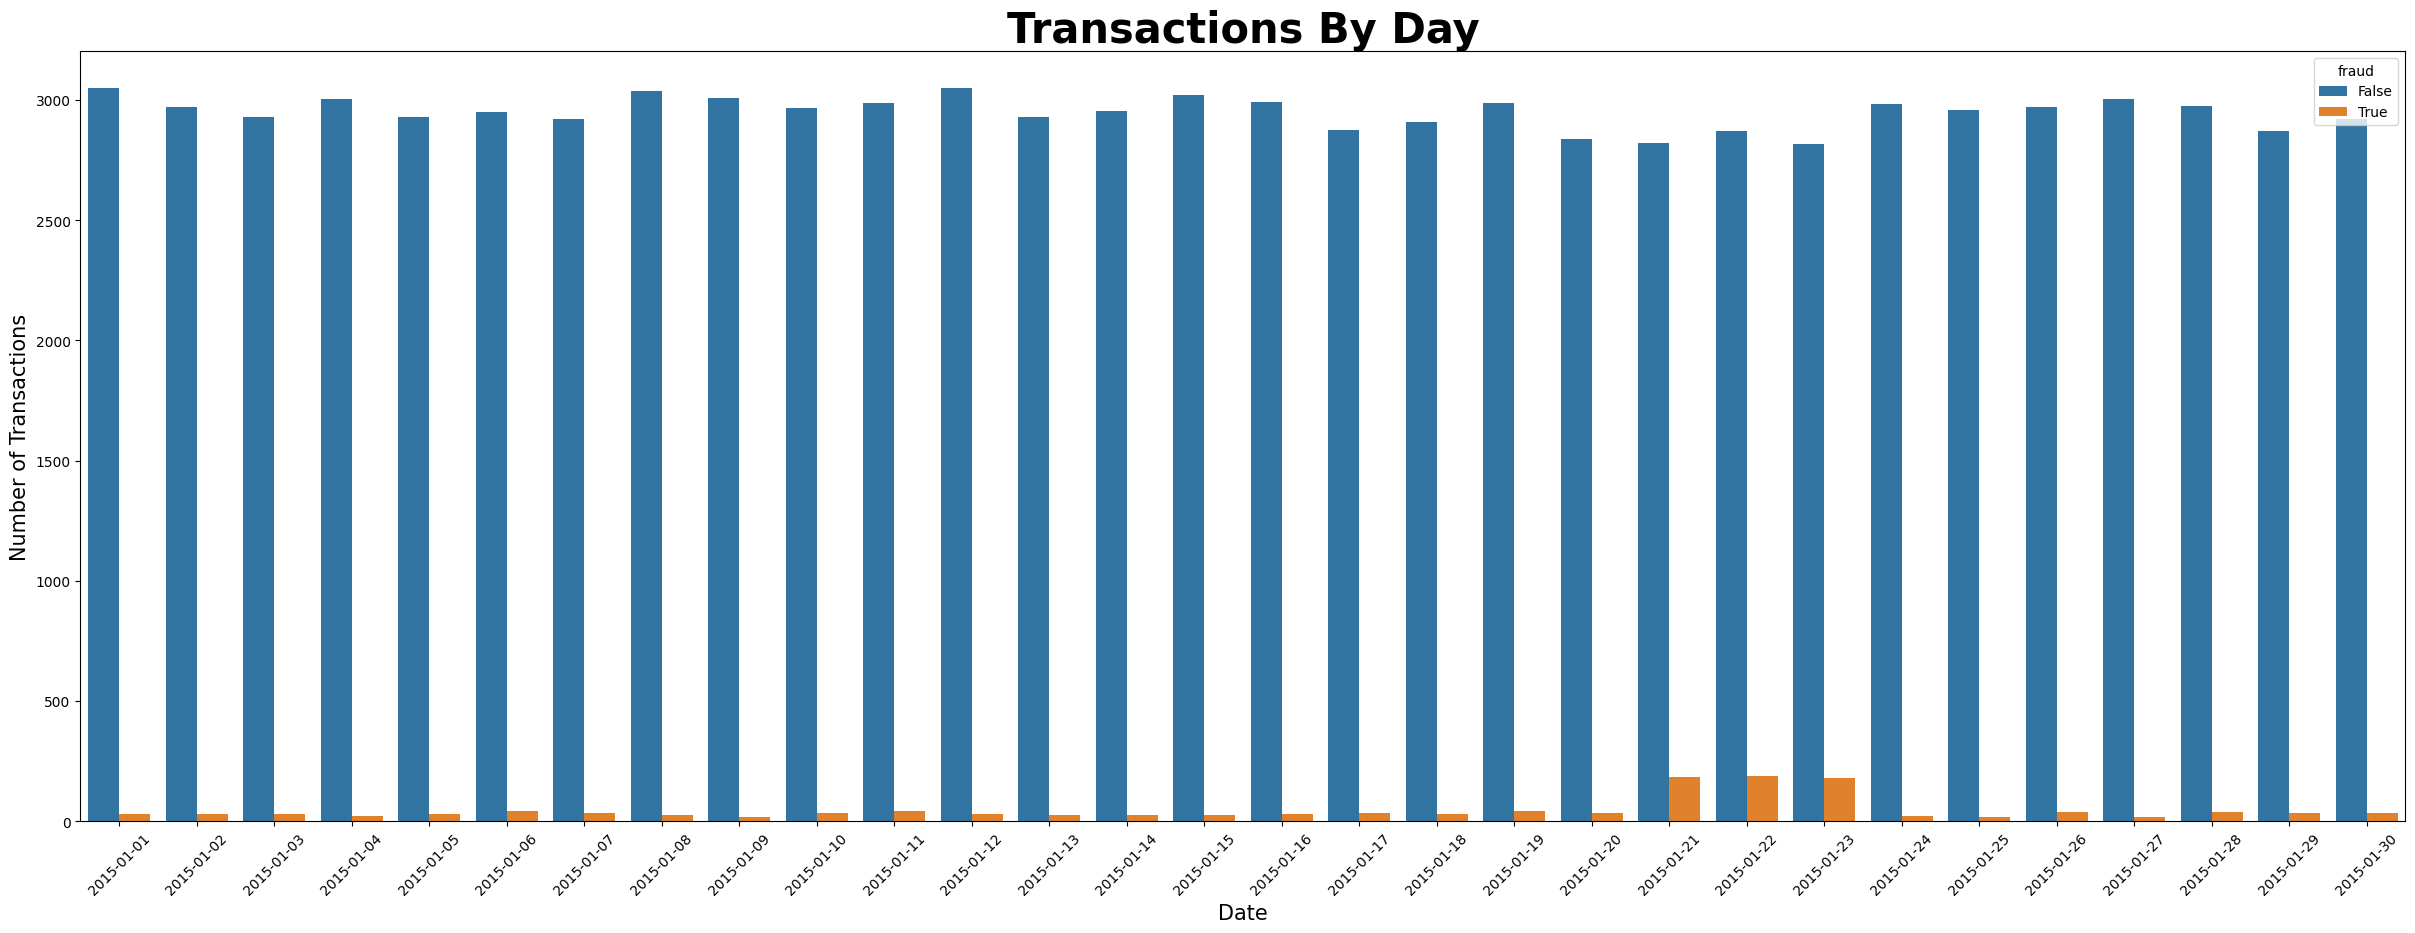

In [6]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=45)
graph = sns.countplot(data=df, x='date', y = None, hue = 'fraud')
graph.set_title("Transactions By Day", fontdict={'size': 30, 'weight': 'bold'})
graph.set_xlabel("Date", fontdict={'size': 15})
graph.set_ylabel("Number of Transactions", fontdict={'size': 15})
plt.show()


Through this basic count plot, we can see that fraud spikes on 1/21-1/23. I want to take a further look into this data

In [7]:
fraud_df = df[df['fraud']==True]

In [8]:
fraud_df.head()

,account,date,fraud,merchant
17,A3,2015-01-01,True,M50
83,A26,2015-01-01,True,M10
94,A29,2015-01-01,True,M94
263,A81,2015-01-01,True,M69
420,A133,2015-01-01,True,M81


Text(0, 0.5, 'Number of Fraudulent Transactions')

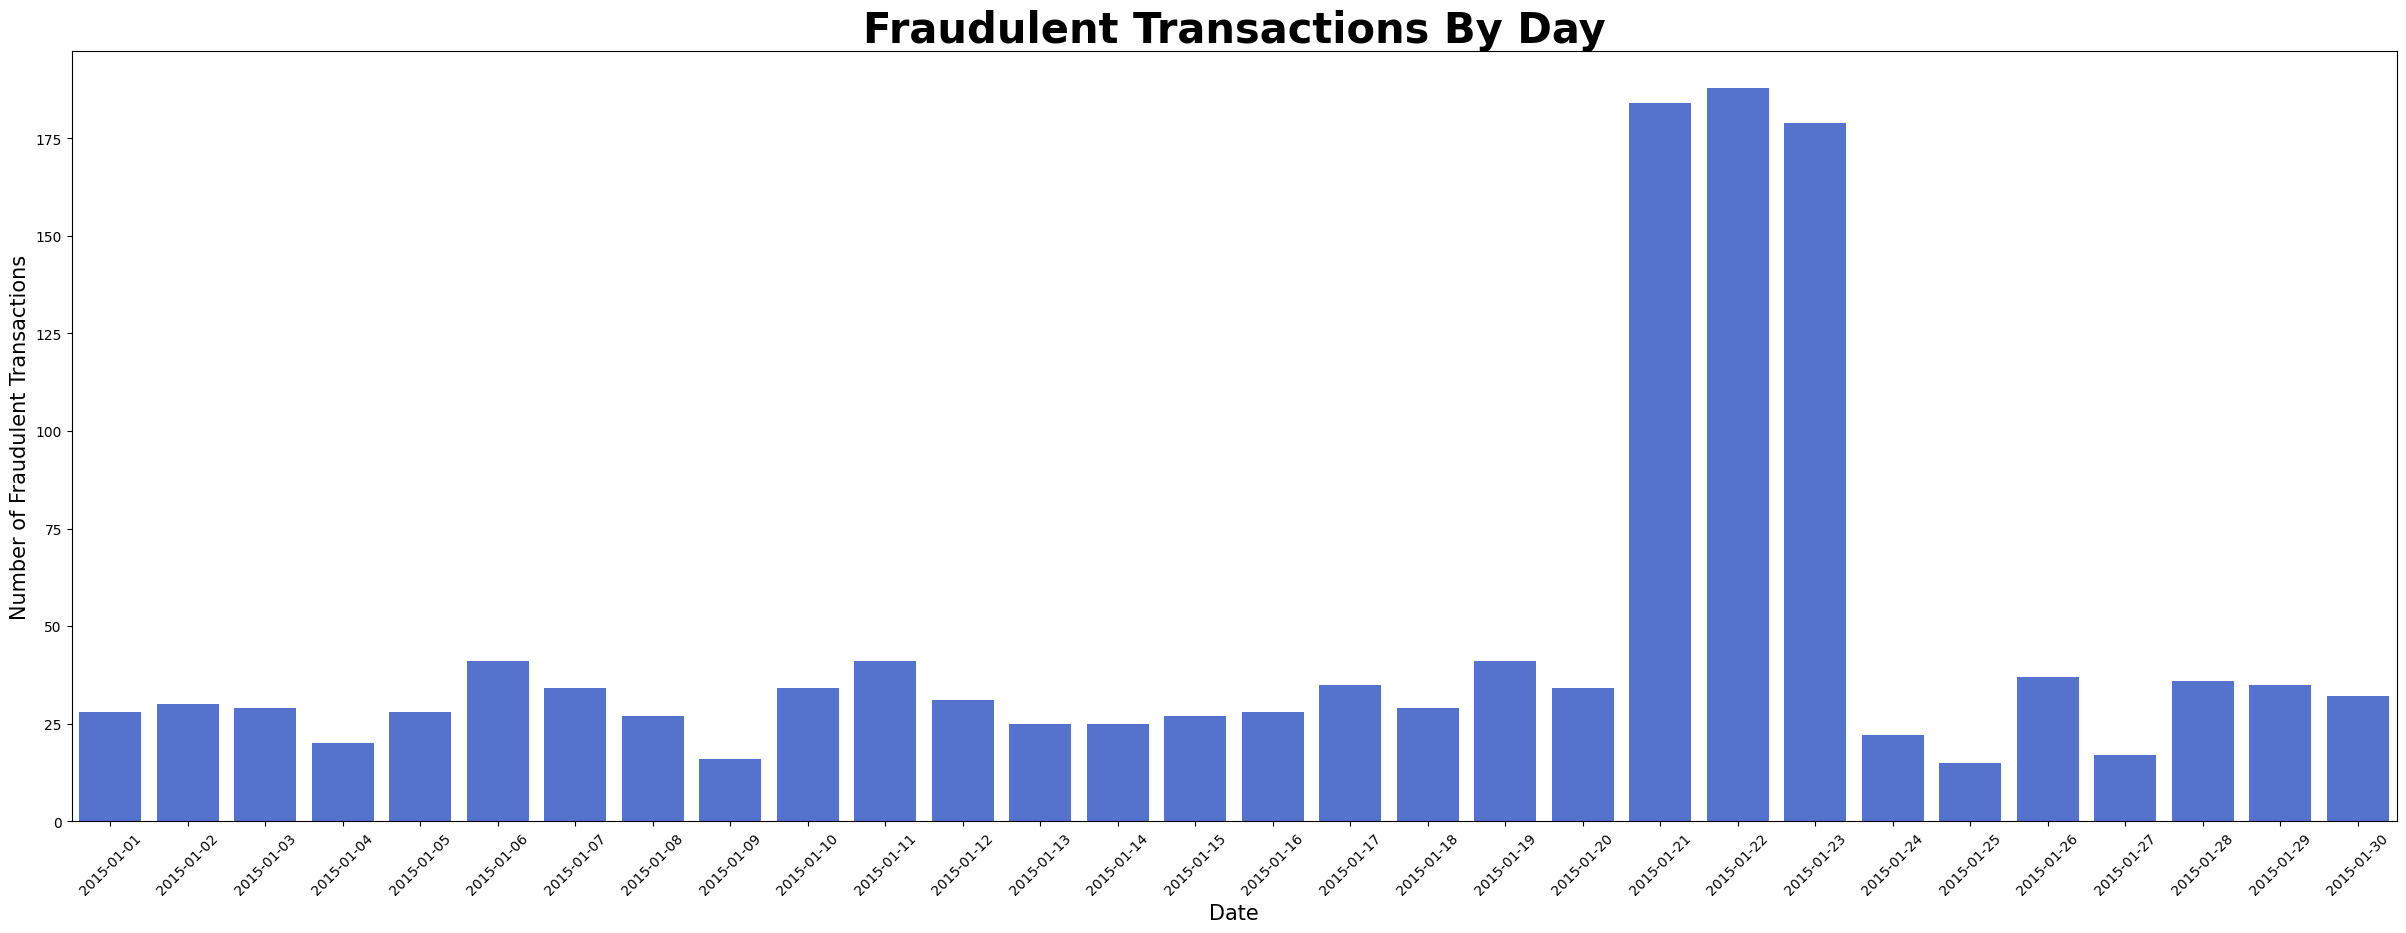

In [9]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=45)
graph = sns.countplot(data=fraud_df, x='date', y = None, color='royalblue')
graph.set_title("Fraudulent Transactions By Day", fontdict={'size': 30, 'weight': 'bold'})
graph.set_xlabel("Date", fontdict={'size': 15})
graph.set_ylabel("Number of Fraudulent Transactions", fontdict={'size': 15})


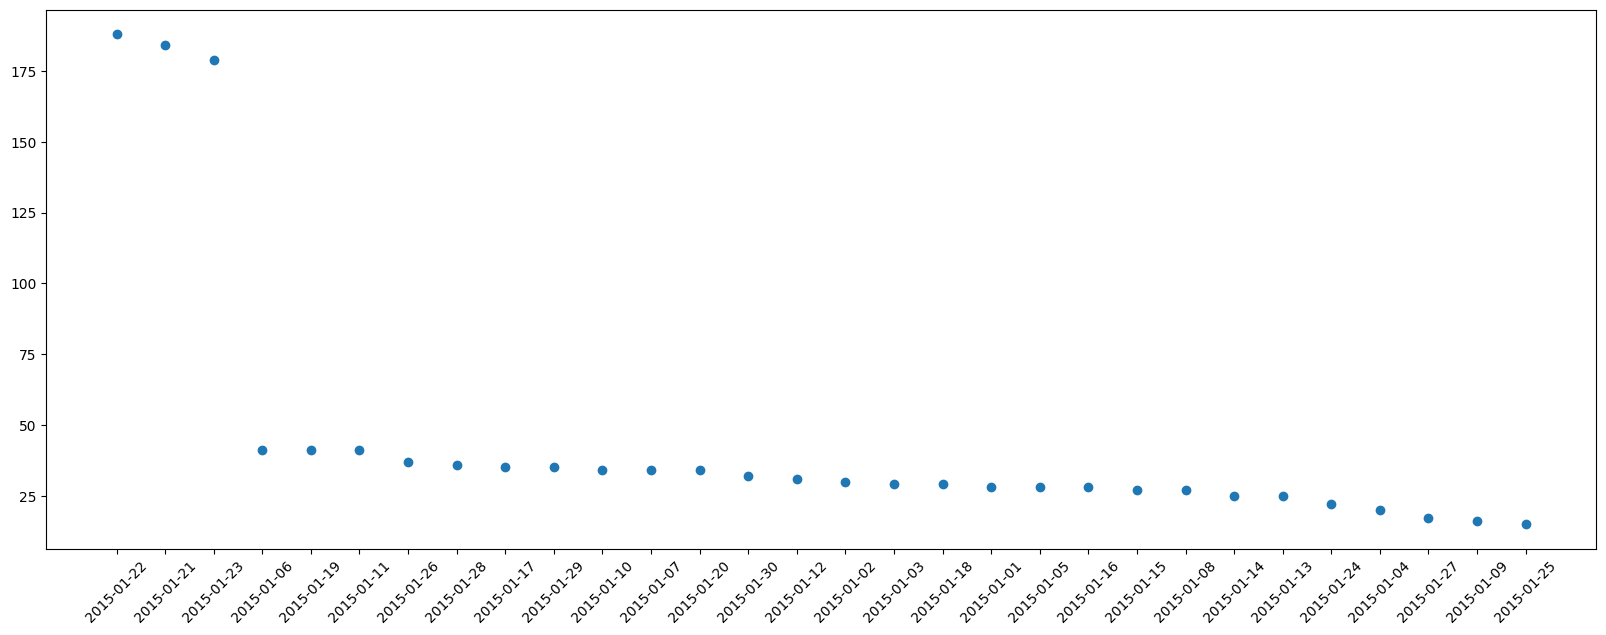

In [10]:
scatter_plot_data = fraud_df.filter(['date', 'fraud'], axis=1)
scatter_plot_data['date'] = scatter_plot_data['date'].astype(str)
scatter_plot_data = scatter_plot_data['date'].value_counts()
x = scatter_plot_data.index.tolist()
y = scatter_plot_data.tolist()
plt.figure(figsize=(20,7))
plt.xticks(rotation=45)
graph = plt.scatter(x, y)

Now that we've been able to see this on a larger scale, it is pretty evident that these 3 days are the 3 days of exploitation, as there is more than a 300% increase of fraud on these 3 days as compared to the next highest day. In both of these charts, we can see the disparity between the 3 days and the remaining 27 days

In [11]:
fraud_df.describe().transpose()

,count,unique,top,freq
account,1348,617,A425,16
date,1348,30,2015-01-22,188
fraud,1348,1,True,1348
merchant,1348,100,M57,22


In [12]:
fraud_df_date_filtered = fraud_df[(fraud_df['date']>'2015-01-23') |(fraud_df['date']<'2015-01-21')]

Text(0, 0.5, 'Number of Fraudulent Transactions')

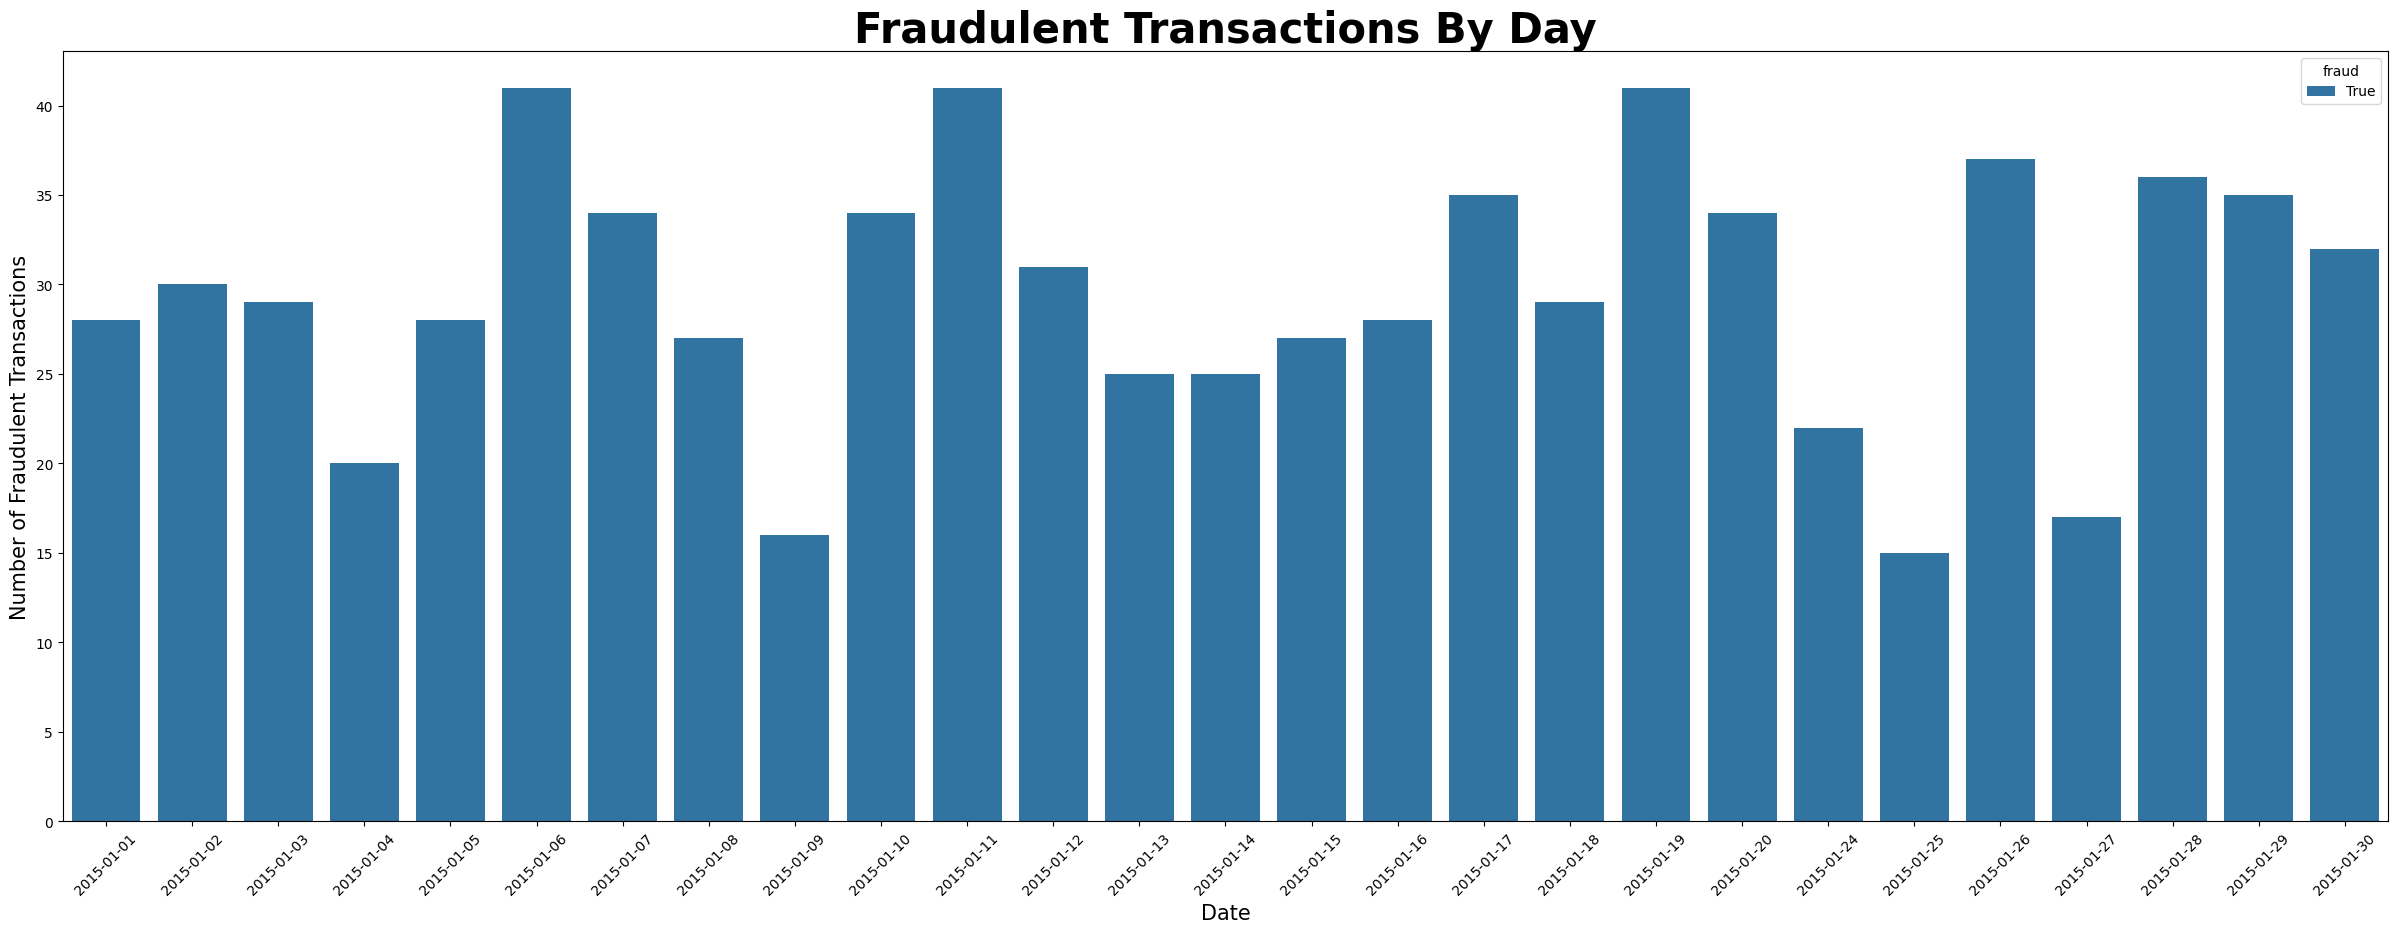

In [13]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=45)
graph = sns.countplot(data=fraud_df_date_filtered, x='date', y = None, hue = 'fraud')
graph.set_title("Fraudulent Transactions By Day", fontdict={'size': 30, 'weight': 'bold'})
graph.set_xlabel("Date", fontdict={'size': 15})
graph.set_ylabel("Number of Fraudulent Transactions", fontdict={'size': 15})

In [14]:
fraud_df_date_filtered.describe().transpose()

,count,unique,top,freq
account,797,552,A82,4
date,797,27,2015-01-06,41
fraud,797,1,True,797
merchant,797,100,M79,15


Now we can see the difference between the data with and without these outliers. From 1/21-1/23, there were an average of over 175 fraudulent transactions, with a max on 1/22 of 188. If we exclude these 3 dates, the maximum number was 41 transactions on 1/19. Based on this, we can safely assume that 1/21, 1/22, and 1/23 are the three days where the fraud was exploited.

In [15]:
fraud_dates_df = fraud_df[(fraud_df['date']<='2015-01-23') &(fraud_df['date']>='2015-01-21')]

I now want to gather which accounts were compromised by seeing which accounts made a significant number of fraudulent transactions on these 3 days. We are going to look at any account that has more than 3 fraudulent transactions over this 3-day period. I expect there to be many accounts with 1-3 fraudulent transactions over this period, and I therefore want to remove the clutter from the data to see the accounts that have some larger issues. 

The logic for setting the cutoff to 3 reports of fraudulent activity is because this would represent 1 per day. Anything more than this is noteworthy, and anything less than this may constitute opportunistic fraud.

In [16]:
data_counts = fraud_dates_df.value_counts(subset='account')
fraud_accounts = pd.DataFrame({'Account' : data_counts.index.tolist(), 'Fraud Count' : data_counts.tolist()})
fraud_accounts = fraud_accounts[fraud_accounts['Fraud Count']>3]
fraud_accounts.head()

,Account,Fraud Count
0,A746,15
1,A425,15
2,A781,14
3,A896,14
4,A841,13


Text(0, 0.5, 'Number of Fraudulent Transactions')

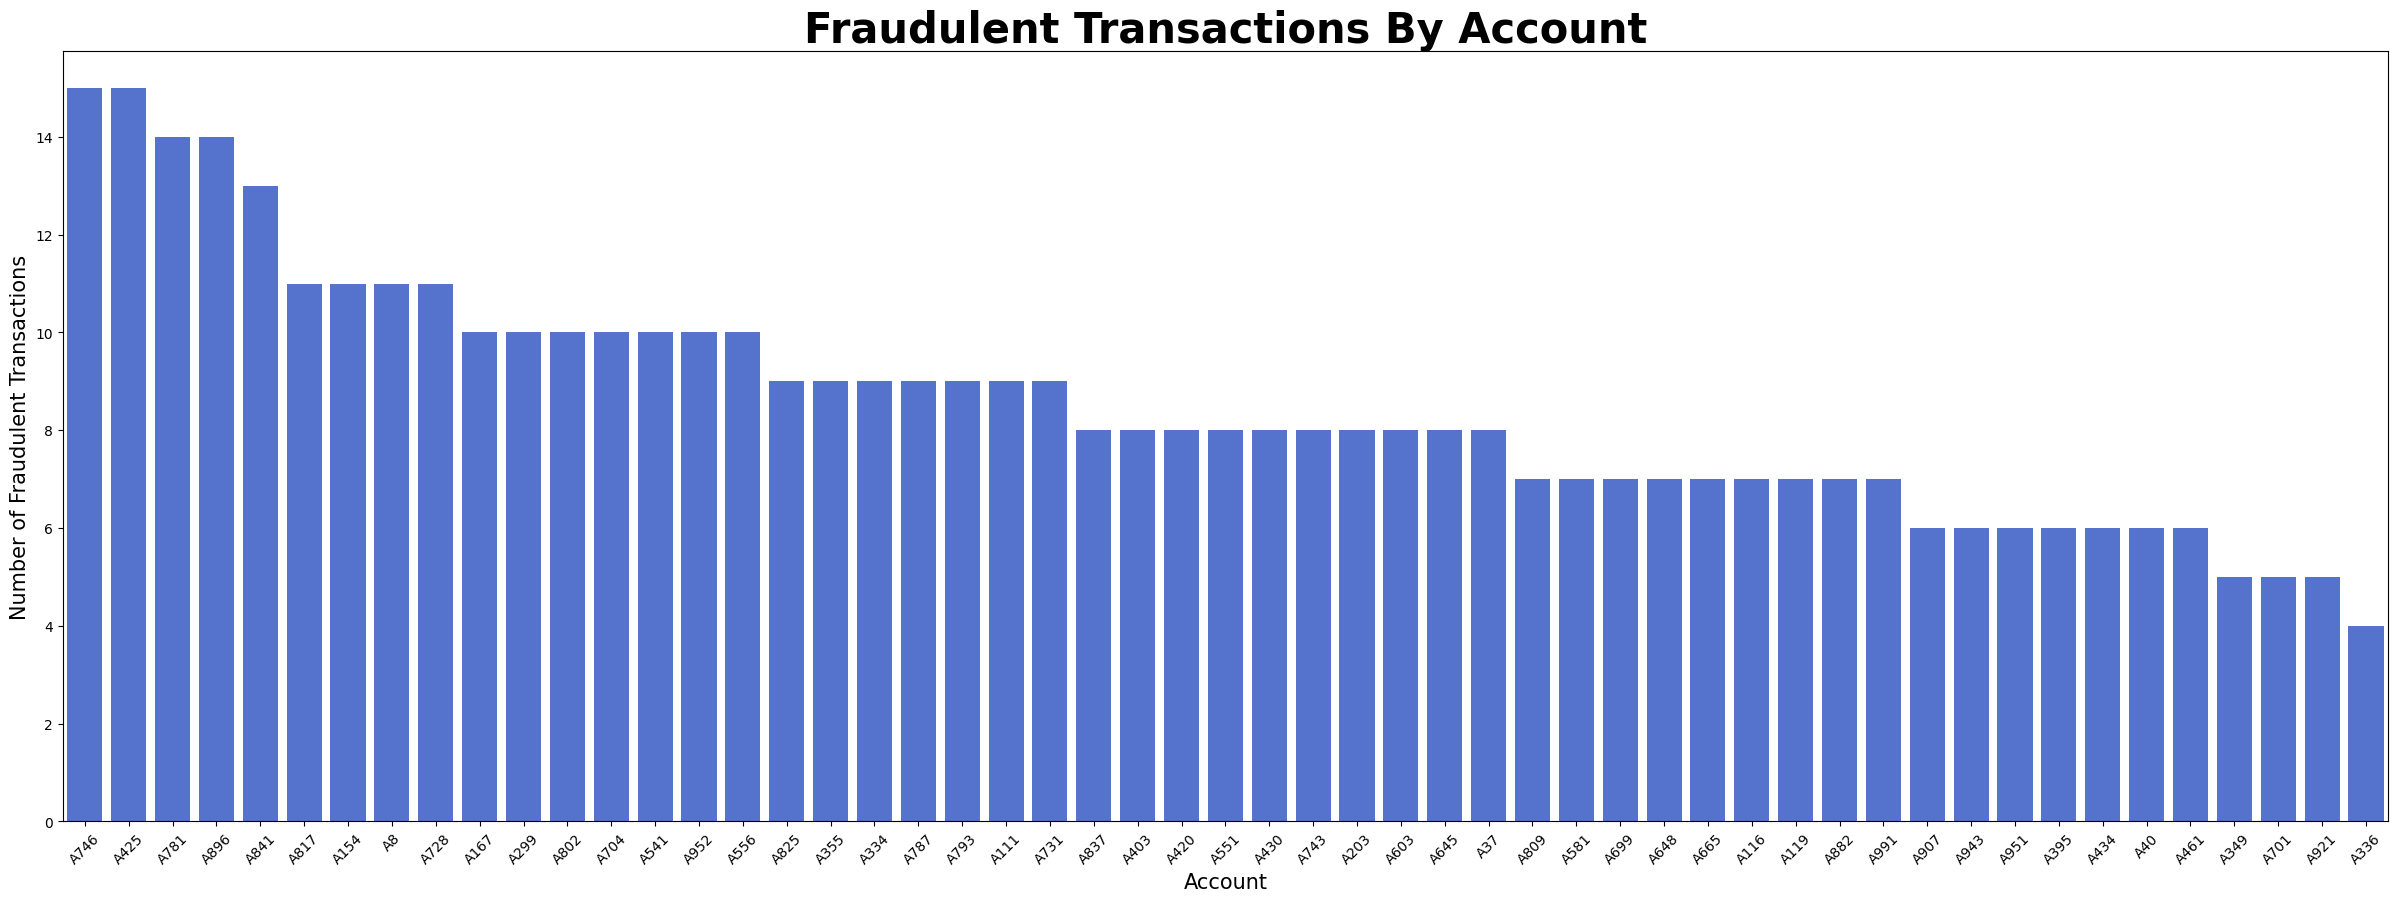

In [17]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=45)
graph = sns.barplot(data=fraud_accounts, x='Account', y = "Fraud Count", hue = None, color= "royalblue")
graph.set_title("Fraudulent Transactions By Account", fontdict={'size': 30, 'weight': 'bold'})
graph.set_xlabel("Account", fontdict={'size': 15})
graph.set_ylabel("Number of Fraudulent Transactions", fontdict={'size': 15})

In [18]:
fraud_accounts.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Fraud Count,53.0,8.528302,2.523762,4.0,7.0,8.0,10.0,15.0


We see now there are 53 accounts that we have marked as potentially fraudulent accounts. These range from havnig 4 to 15 fraudulent activities during the 3 day span. I now want to take these 53 accounts and create a heatmap to see when and where these accounts overlapped shopping experiences pre-fraudulent activity

In [19]:
potential_fraud = df[(df['date']<'2015-01-21')]
potential_fraud = potential_fraud.loc[potential_fraud['account'].isin(fraud_accounts['Account'])]


I consciously decided to keep transactions marked as fraud included. This is because there may have been activity marked as fraud on the day of the exploitation, and I did not want to exclude this data.

In [20]:
potential_fraud.describe().transpose()

,count,unique,top,freq
account,3212,53,A551,80
date,3212,20,2015-01-16,194
fraud,3212,2,False,3181
merchant,3212,100,M18,75


In [21]:
heatmap_data = potential_fraud.filter(["merchant", "date"], axis=1)
heatmap_data


,merchant,date
30,M46,2015-01-01
31,M51,2015-01-01
126,M98,2015-01-01
127,M44,2015-01-01
128,M1,2015-01-01
...,...,...
59774,M93,2015-01-20
59892,M47,2015-01-20
59893,M70,2015-01-20
59894,M63,2015-01-20


<Figure size 3000x1000 with 0 Axes>

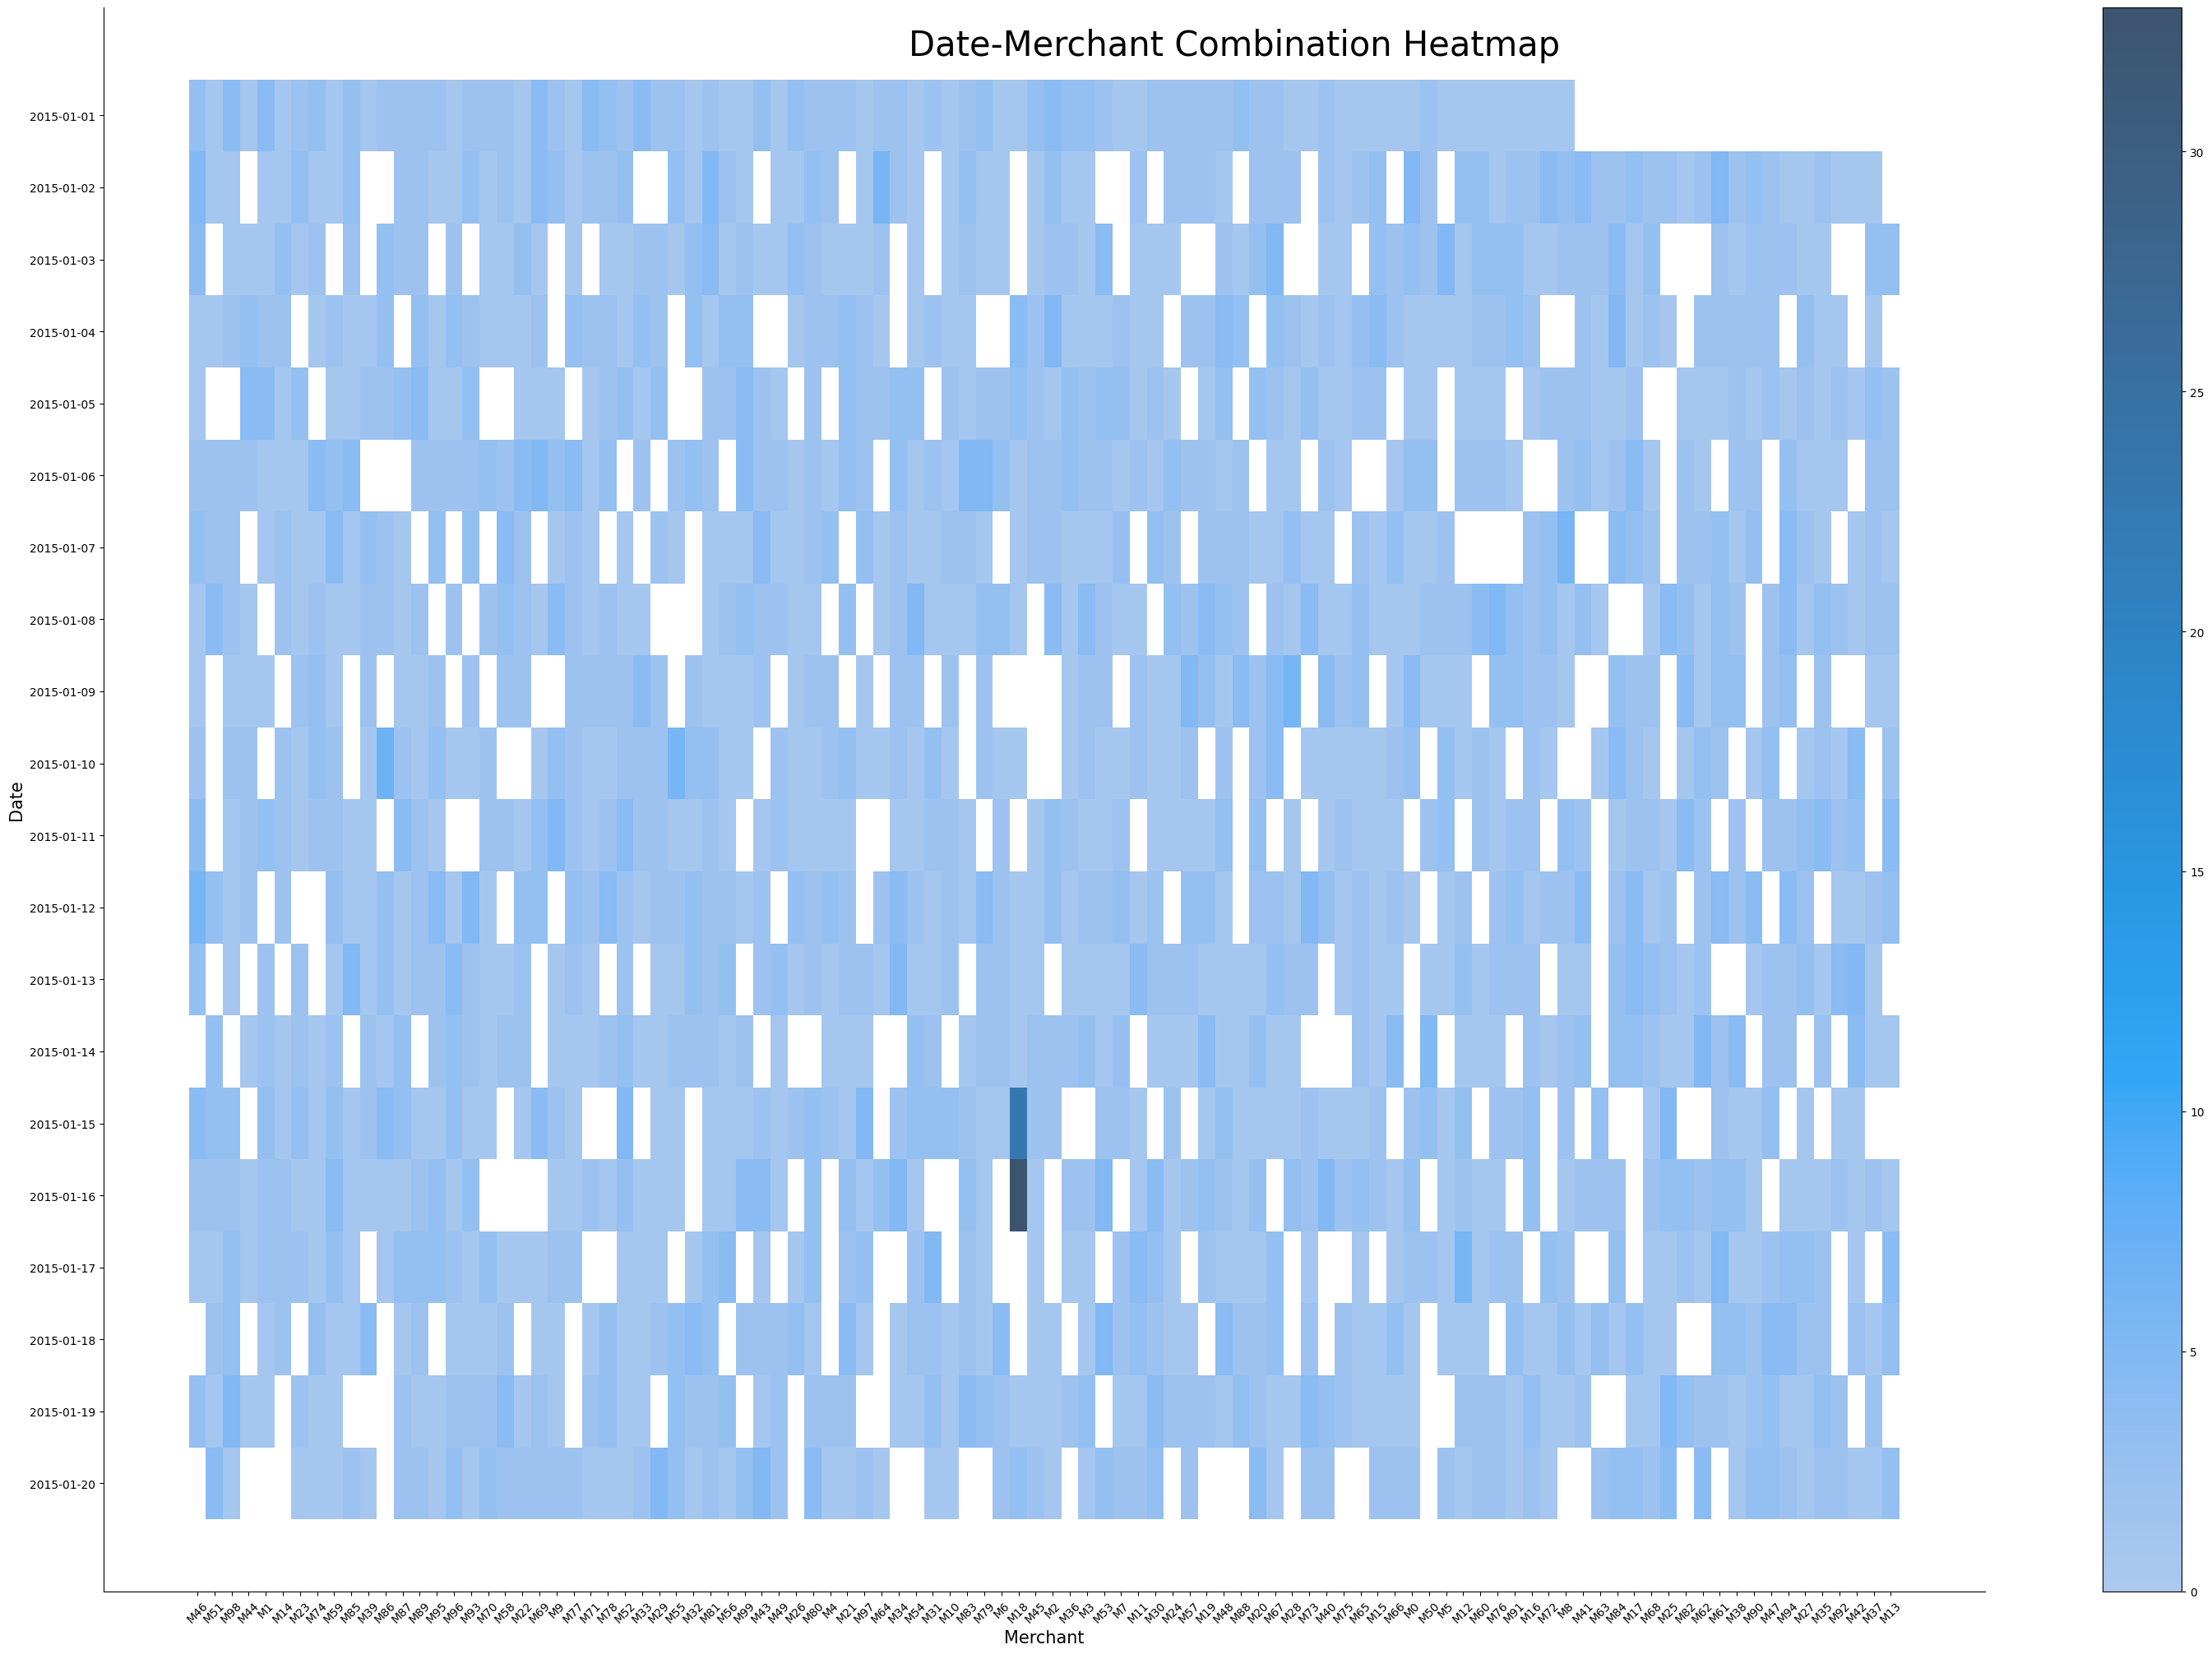

In [22]:
plt.figure(figsize=(30,10))
graph = sns.displot(data=heatmap_data, x="merchant", y="date", height=20, aspect=1.5, cbar = True)
graph.fig.suptitle("Date-Merchant Combination Heatmap", fontsize=30)
graph.set_xlabels("Merchant", fontdict={'size': 15})
graph.set_ylabels("Date", fontdict={'size': 15})
graph.tick_params(axis='x', labelrotation=45)

In [23]:
import re
txt = heatmap_data['merchant']
merchant_as_number_list = []
for index, j in enumerate(heatmap_data['merchant']):
    x=re.split("M",txt.iloc[index])
    merchant_as_number_list.append(int(x[1]))

heatmap2_data = pd.DataFrame({'date' : heatmap_data['date'], 'merchant': heatmap_data['merchant'], 'merchant_number' : merchant_as_number_list})

<Figure size 3000x1000 with 0 Axes>

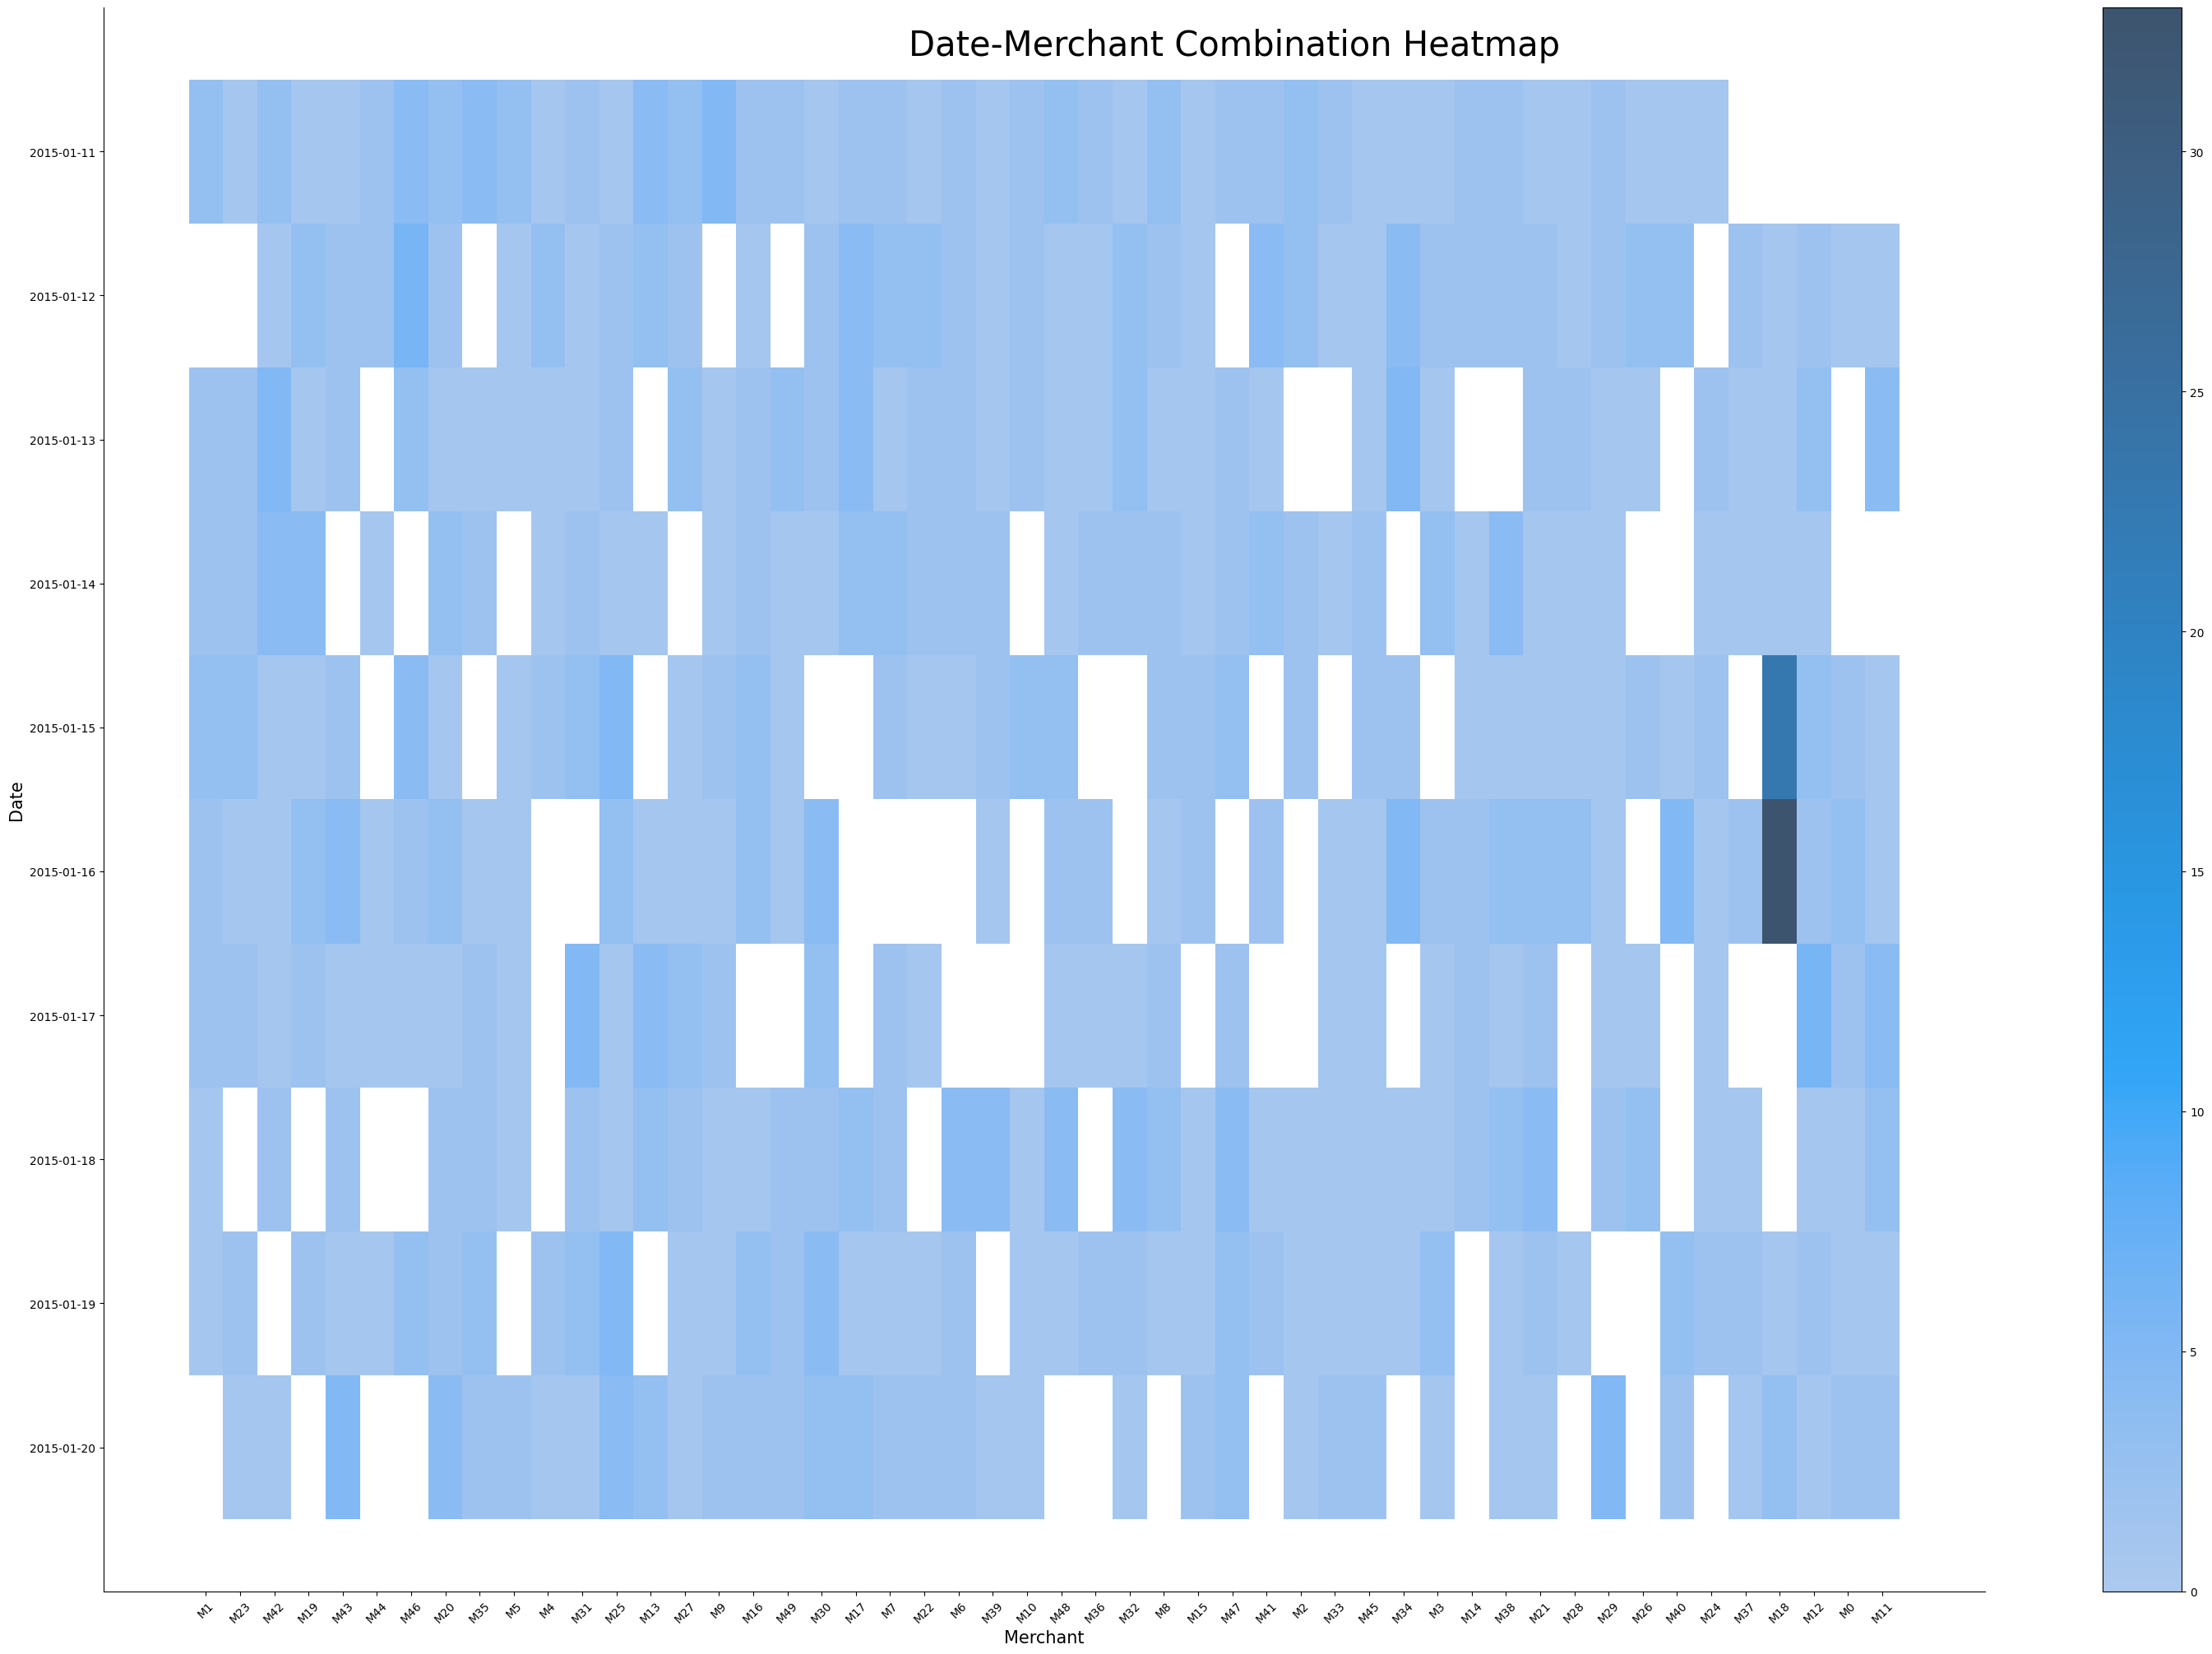

In [24]:
heatmap2_data = heatmap2_data[(heatmap2_data['merchant_number'] < 50) & (heatmap2_data['date']>'2015-01-10')]
plt.figure(figsize=(30,10))
graph = sns.displot(data=heatmap2_data, x="merchant", y="date", height=20, aspect=1.5, cbar = True)
graph.fig.suptitle("Date-Merchant Combination Heatmap", fontsize=30)
graph.set_xlabels("Merchant", fontdict={'size': 15})
graph.set_ylabels("Date", fontdict={'size': 15})
graph.tick_params(axis='x', labelrotation=45)

We can see that January 15 and 16 are outliers here for merchant M18. Thus, it is likely that these 2 days are the 2 days of exploitation.

While normally I would put the dates on the x-axis, I opted to put them on the y-axis so that it would fit into the slideshow better. For horizontal version, switch x and y values in line 2 and swap the labels.

The second visual is just for the presentation. I removed any merchant over M50 and any date before 2015-01-10 in order to make it an easier read. It is easier to see the date-merchant combo when the data is enlarged.

In [25]:
potential_fraud_dates = potential_fraud[(potential_fraud['merchant'] == 'M18') & ((potential_fraud['date']=='2015-01-15') | (potential_fraud['date']=='2015-01-16'))]

In [26]:
potential_fraud_dates.describe().transpose()

,count,unique,top,freq
account,56,53,A355,2
date,56,2,2015-01-16,33
fraud,56,2,False,55
merchant,56,1,M18,56


On these 2 days, there are an average of 28 transactions per day from these accounts with potentially fraudulent activity at M18. In contrast, over the 20 dates with 100 merchants (2000 date-merchant combinations), there are 3212 total transactions, meaning there is an average of approximately 1.6 transactions per date-merchant combination. These 2 date-merchant combinations (M18 on 2015-01-15 and M18 on 2015-01-16) have an average more than 15 times higher than the average over all 2000 combinations.

In summary, I was able to follow the steps outlined at the beginning in order to successfully pick out the fraudulent dates, find the customer accounts that were exploited, and then find the merchant and dates where these customer accounts were exploited. <br><br>

<b><u>Compromised Merchant:</u></b> M18 <br>
<b><u>Compromise Dates:</u></b> 2015-01-15, 2015-01-16 <br>
<b><u>Exploitation Dates:</u></b> 2015-01-21, 2015-01-22, 2015-01-23

Here, I am running a two-sample t-test in order to see how likely it is that: the high number of transactions from accounts that had the fraudulent activity all having activity at M18 on Jan 15 or 16 is by chance.

In [27]:
non_potential_fraud_dates = potential_fraud.merge(potential_fraud_dates, how='left', indicator=True)
non_potential_fraud_dates = non_potential_fraud_dates[non_potential_fraud_dates['_merge']=='left_only']
non_potential_fraud_dates = non_potential_fraud_dates.drop(columns="_merge")
non_fraud_dates_value_counts = non_potential_fraud_dates.drop(columns=['fraud', 'account']).value_counts().tolist()
fraud_dates_value_counts = potential_fraud_dates.drop(columns=['fraud', 'account']).value_counts().tolist()

In [28]:
from scipy.stats import ttest_ind
# Perform two-sample t-test
t_statistic, p_value = ttest_ind(fraud_dates_value_counts, non_fraud_dates_value_counts)

# Output the results
print(f"t-statistic: {t_statistic}")
print(f"P-value: {p_value}")

t-statistic: 34.77286921009626
P-value: 6.79047228016335e-198


The p-value here is extremely small, showing that the odds of this happening are well below 1%. Because p < .05, we can say that this is statistically significant enough of a difference. 